# using different classification evaluation metrics
applying naive bayes:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
df = pd.read_csv('/kaggle/input/mal-data/mail_data.csv')
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [3]:
# Splitting data into features and labels
X = df['Message']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# Converting text data into numerical vectors
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
# Training the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)
# Making predictions on the test set
predictions = clf.predict(X_test_counts)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
y_test

2825     ham
3695     ham
3904     ham
576     spam
2899     ham
        ... 
854      ham
5044     ham
2015     ham
3380     ham
785      ham
Name: Category, Length: 1115, dtype: object

In [5]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions, pos_label='spam')
recall = recall_score(y_test, predictions, pos_label='spam')
f1 = f1_score(y_test, predictions, pos_label='spam')
# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9855072463768116
Recall: 0.912751677852349
F1-score: 0.9477351916376308


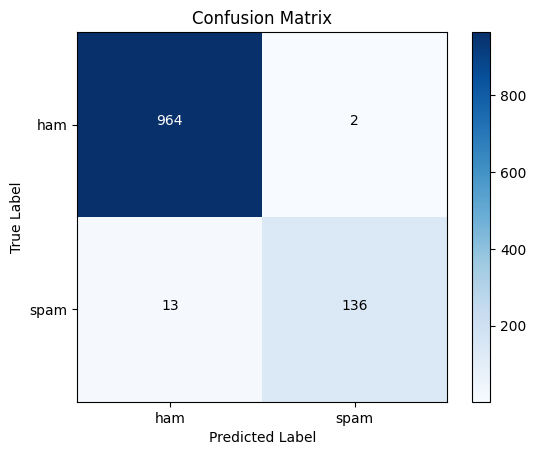

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['ham', 'spam']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

In [7]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Interpretation and analysis
print("\nInterpretation and Analysis:")
print("The confusion matrix provides a visual representation of the classifier's performance.")
print("The classification report gives detailed metrics for each class (precision, recall, F1-score, support).")
print("Based on these metrics, we can analyze the classifier's ability to classify emails as 'ham' or 'spam'.")
print("We can further adjust parameters or try different classification methods to improve performance.")


Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115


Interpretation and Analysis:
The confusion matrix provides a visual representation of the classifier's performance.
The classification report gives detailed metrics for each class (precision, recall, F1-score, support).
Based on these metrics, we can analyze the classifier's ability to classify emails as 'ham' or 'spam'.
We can further adjust parameters or try different classification methods to improve performance.


Applying Random Forest Classifier on the same dataset:

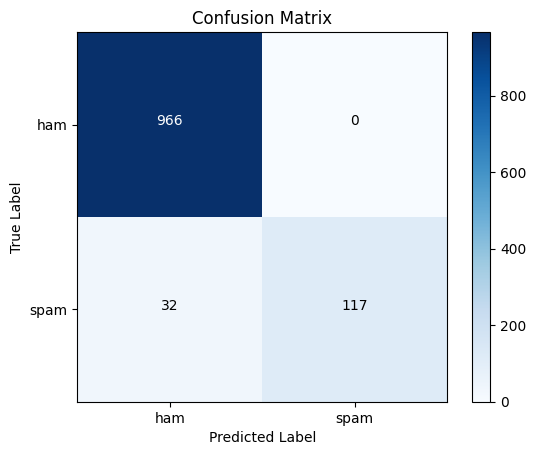


Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Interpretation and Analysis:
The confusion matrix provides a visual representation of the classifier's performance.
The classification report gives detailed metrics for each class (precision, recall, F1-score, support).
Based on these metrics, we can analyze the classifier's ability to classify emails as 'ham' or 'spam'.
We can further adjust parameters or try different classification methods to improve performance.


In [8]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_counts, y_train)
# Predict labels for test data
predictions = rf_classifier.predict(X_test_counts)
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Interpretation and analysis
print("\nInterpretation and Analysis:")
print("The confusion matrix provides a visual representation of the classifier's performance.")
print("The classification report gives detailed metrics for each class (precision, recall, F1-score, support).")
print("Based on these metrics, we can analyze the classifier's ability to classify emails as 'ham' or 'spam'.")
print("We can further adjust parameters or try different classification methods to improve performance.")